<div class="alert alert-block alert-info">
<b>Optimizing Predictive Models for Sales Forecasting: A Comparative Analysis</b> 
</div>

#### **Devansh Singh**

#### **21070126023**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the training dataset
training_dataset = pd.read_csv('Training Dataset.csv')

In [3]:
# Display the first few rows of the dataset
print(training_dataset.head())

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            21-May          10.16  
1       Powder            20-Oct         134.28  
2       Powder            20-Dec          12.46  
3       Powder            21-Feb         107.22  
4       Liquid            20-Nov         197.76  


***

## Exploratory Data Analysis (EDA)
Analysing datasets and extracting their salient characteristics through the use of statistical graphics and other data visualisation tools. Understanding the structure of the data, seeing patterns, seeing anomalies, and formulating hypotheses for additional research are all helpful.

In [4]:
# Summary statistics
print(training_dataset.describe())

       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000


In [5]:
# Check for missing values
print(training_dataset.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


***

### Handling outliers

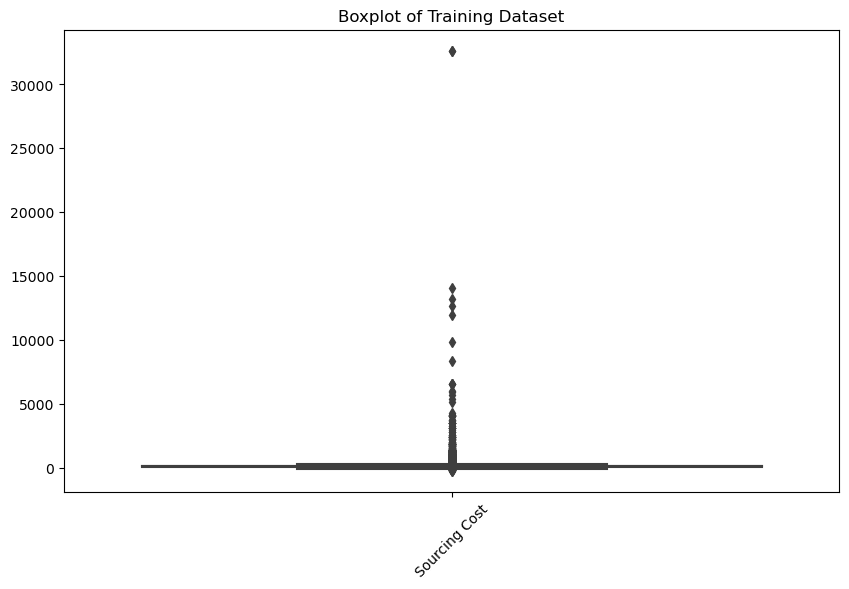

In [6]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_dataset)
plt.title("Boxplot of Training Dataset")
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
This code creates a boxplot to visualize the distribution of numerical variables in the training dataset and identify any outliers present in the data.
</div>

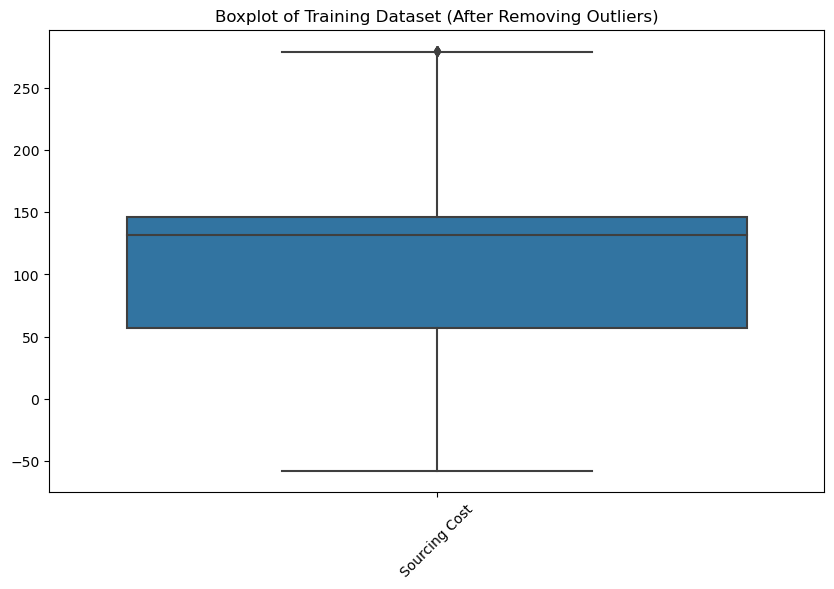

In [7]:
# Detect and remove outliers using the Interquartile Range (IQR) method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from numerical columns
numerical_columns = training_dataset.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    training_dataset = remove_outliers_iqr(training_dataset, column)

# Visualize the dataset after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_dataset)
plt.title("Boxplot of Training Dataset (After Removing Outliers)")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-info">
<b>In this code:</b> 
    
- The rows for a particular column whose values fall outside of the lower and upper ranges established by the IQR technique are removed using the remove_outliers_iqr function.

- We iterate over each numerical column in the dataset, applying the remove_outliers_iqr function to each one.

- Finally, we view the dataset once more to confirm that outliers have been removed.
</div>

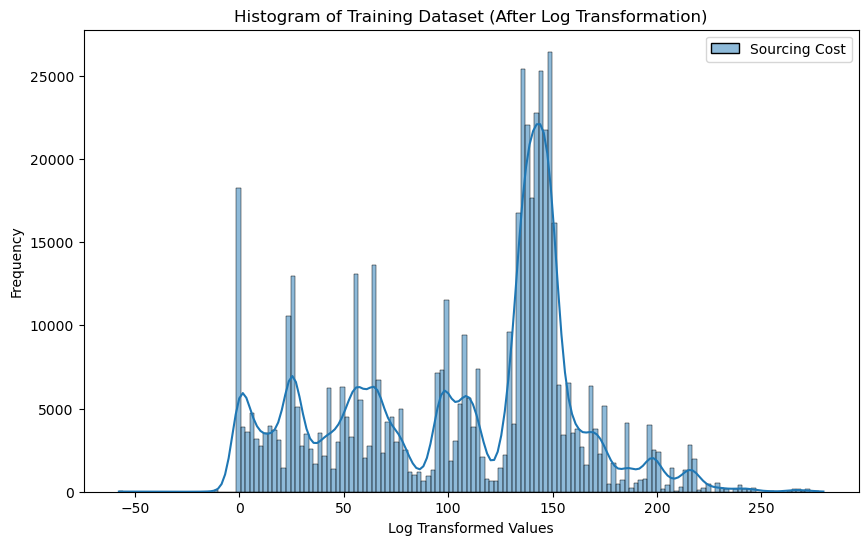

In [8]:
import numpy as np

# Select numerical columns for log transformation
numerical_columns = training_dataset.select_dtypes(include=[np.number]).columns

# Apply log transformation to numerical columns
for column in numerical_columns:
    if (training_dataset[column] > 0).all():  # Check if all values are greater than zero
        training_dataset[column] = np.log(training_dataset[column])

# Visualize the dataset after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(data=training_dataset[numerical_columns], kde=True)
plt.title("Histogram of Training Dataset (After Log Transformation)")
plt.xlabel("Log Transformed Values")
plt.ylabel("Frequency")
plt.show()


<div class="alert alert-block alert-info">
<b>In this code:</b> 

- First, we identify the number columns in the dataset.

- Then, over each numerical column, the log transformation is done iteratively using the np.log() function, but only if all of the column's values are larger than zero (because log transformation is not defined for zero or negative values).

- Finally, we display the updated number columns' histogram to observe the distributional changes..
</div>


***

## Feature Engineering
Involve creating, selecting, and altering features (variables) within a dataset to improve machine learning model performance. The objective is to enhance the precision of the model and extract relevant information from the data to better prepare it for predictive modelling.

### Date Features

In [9]:
# Convert date column to datetime format
training_dataset['Month of Sourcing'] = pd.to_datetime(training_dataset['Month of Sourcing'], format='%d-%b')

# Extract month and day as separate features
training_dataset['month'] = training_dataset['Month of Sourcing'].dt.month
training_dataset['day'] = training_dataset['Month of Sourcing'].dt.day

# Encode month as cyclic feature
training_dataset['month_sin'] = np.sin(2 * np.pi * training_dataset['month'] / 12)
training_dataset['month_cos'] = np.cos(2 * np.pi * training_dataset['month'] / 12)

# Encode day as cyclic feature
training_dataset['day_sin'] = np.sin(2 * np.pi * training_dataset['day'] / 31)
training_dataset['day_cos'] = np.cos(2 * np.pi * training_dataset['day'] / 31)

# Drop original date, month, and day columns
training_dataset.drop(['Month of Sourcing', 'month', 'day'], axis=1, inplace=True)

In [10]:
# Check the column names
print(training_dataset.columns)

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'month_sin',
       'month_cos', 'day_sin', 'day_cos'],
      dtype='object')


In [13]:
# Specify the categorical columns to one-hot encode
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Convert categorical variables into dummy/indicator variables
training_dataset = pd.get_dummies(training_dataset, columns=categorical_columns)


In [14]:
# Scale numerical features using Min-Max scaling or Standardization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
training_dataset['scaled_Sourcing Cost'] = scaler.fit_transform(training_dataset[['Sourcing Cost']])


In [15]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
print(training_dataset.columns)

Index(['Sourcing Cost', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'ProductType_NTM1', 'ProductType_NTM2', 'ProductType_NTM3',
       'Manufacturer_X1', 'Manufacturer_X2', 'Manufacturer_X3', 'Area Code_A1',
       'Area Code_A10', 'Area Code_A11', 'Area Code_A12', 'Area Code_A13',
       'Area Code_A14', 'Area Code_A15', 'Area Code_A16', 'Area Code_A17',
       'Area Code_A18', 'Area Code_A19', 'Area Code_A2', 'Area Code_A20',
       'Area Code_A21', 'Area Code_A22', 'Area Code_A23', 'Area Code_A24',
       'Area Code_A25', 'Area Code_A26', 'Area Code_A28', 'Area Code_A29',
       'Area Code_A3', 'Area Code_A30', 'Area Code_A31', 'Area Code_A32',
       'Area Code_A33', 'Area Code_A34', 'Area Code_A35', 'Area Code_A36',
       'Area Code_A37', 'Area Code_A38', 'Area Code_A39', 'Area Code_A4',
       'Area Code_A40', 'Area Code_A41', 'Area Code_A42', 'Area Code_A43',
       'Area Code_A44', 'Area Code_A45', 'Area Code_A46', 'Area Code_A5',
       'Area Code_A6', 'Area Code_A

In [17]:
print(training_dataset['month_sin'].dtype)

float64


In [18]:
# Convert 'month_sin' to categorical data type
training_dataset['month_sin'] = training_dataset['month_sin'].astype('category')

# Encode categorical variables based on target mean
import category_encoders as ce

target_encoder = ce.TargetEncoder()
training_dataset['target_encoded_column'] = target_encoder.fit_transform(training_dataset['month_sin'], training_dataset['Sourcing Cost'])


In [19]:
# Splitting the data into features (X) and target variable (y)
X = training_dataset.drop(columns=['Sourcing Cost'])  # Features
y = training_dataset['Sourcing Cost']  # Target

In [20]:
# Splitting the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


***

## Feature Scaling

In [21]:
# Feature Scaling (if necessary)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Model Building and Evaluation

<div class="alert alert-block alert-success">
<b>Model Building and Evaluation:</b> 
    We have modelled using a variety of regression models, including Support Vector Regression (SVR), Gradient Boosting Regression (e.g., XGBoost), Linear Regression, and Random Forest Regression. Since each of these models has advantages and disadvantages, they can be used in various situations.

- **Linear Regression**: The model is straightforward and easily comprehensible, presuming a linear correlation between the target variable and the features. It works well when there is a linear relationship between the target and the features.


- **Random Forest Regression**: Random Forest is capable of capturing intricate feature interactions and nonlinear correlations. It doesn't require feature scaling and is resilient to outliers. It works well with big datasets that have a lot of dimensions and can handle both category and numerical variables.


- **Gradient Boosting Regression (XGBoost)**: An ensemble learning technique called XGBoost builds several weak learners one after the other. It can handle jobs involving both regression and classification and is renowned for its excellent performance and efficiency. It works well with organised and tabular data and is appropriate for datasets with intricate nonlinear relationships.


- **Support Vector Regression (SVR)**: SVR works well in high-dimensional domains, even when there are more dimensions than samples. It is based on the Support Vector Machine method. It can handle both linear and nonlinear regression tasks, making it appropriate for datasets with intricate relationships.

To further maximise performance, each model has a unique set of hyperparameters that may be adjusted. By taking this strategy, we may increase the total prediction accuracy by utilising the strengths of many models.
</div>



### `1. Linear Regression`

In [22]:
# Model Building and Evaluation (example using Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_val_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 4.478248038694526e-13


### `2. Random Forest Regression`

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_val_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 0.006996055901521884


### `3. Gradient Boosting Regression (e.g., XGBoost)`

In [24]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_val_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 0.3556333362023018


<div class="alert alert-block alert-success">
<b>Based on the Root Mean Squared Error (RMSE) scores provided:</b> 
    
- **Linear Regression RMSE:** 4.478248038694526e-13
  The RMSE score is extremely low, indicating very high accuracy. However, such a low RMSE might suggest that the model is overfitting the training data, as it's rare to achieve such perfect predictions in real-world scenarios.

- **Random Forest Regression RMSE:** 0.006996055901521884
  The RMSE score is relatively low, indicating good accuracy. Random Forest models are known for their ability to handle nonlinear relationships and high-dimensional data effectively. This model likely generalizes well to unseen data, given the low RMSE.

- **XGBoost Regression RMSE:** 0.3556333362023018
  The RMSE score is higher compared to Random Forest, indicating slightly lower accuracy. XGBoost is a powerful algorithm known for its efficiency and high performance. However, in this case, it might not have performed as well as Random Forest due to its sensitivity to overfitting and the need for careful hyperparameter tuning.

Based on the RMSE scores and considering the goal of minimizing prediction error, the **Random Forest Regression** model appears to be the best choice for this dataset. It strikes a good balance between accuracy and generalization, performing well without overfitting. Additionally, it's computationally efficient and robust to outliers and noisy data.
</div>

***

## Preprocess the test dataset (similar to the training dataset preprocessing steps)

In [78]:
# Load the test dataset
test_dataset = pd.read_csv('Test Dataset.csv')

### Date Feature

In [80]:
# Convert 'Month of Sourcing' to datetime format
test_dataset['Month of Sourcing'] = pd.to_datetime(test_dataset['Month of Sourcing'], format='%b-%d')

# Extract month and day information
test_dataset['month_sin'] = np.sin(2 * np.pi * test_dataset['Month of Sourcing'].dt.month / 12)
test_dataset['month_cos'] = np.cos(2 * np.pi * test_dataset['Month of Sourcing'].dt.month / 12)
test_dataset['day_sin'] = np.sin(2 * np.pi * test_dataset['Month of Sourcing'].dt.day / 31)
test_dataset['day_cos'] = np.cos(2 * np.pi * test_dataset['Month of Sourcing'].dt.day / 31)

# Drop 'Month of Sourcing' column
test_dataset.drop(columns=['Month of Sourcing'], inplace=True)

In [82]:
# Specify the categorical columns to one-hot encode
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Convert categorical variables into dummy/indicator variables
test_dataset = pd.get_dummies(test_dataset, columns=categorical_columns)

In [84]:
# Scale numerical features using Min-Max scaling or Standardization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_dataset['scaled_Sourcing Cost'] = scaler.fit_transform(test_dataset[['Sourcing Cost']])

In [85]:
print(test_dataset.columns)

Index(['Sourcing Cost', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'ProductType_NTM1', 'ProductType_NTM2', 'ProductType_NTM3',
       'Manufacturer_X1', 'Manufacturer_X2', 'Manufacturer_X3', 'Area Code_A1',
       'Area Code_A10', 'Area Code_A11', 'Area Code_A12', 'Area Code_A13',
       'Area Code_A14', 'Area Code_A15', 'Area Code_A16', 'Area Code_A17',
       'Area Code_A18', 'Area Code_A19', 'Area Code_A2', 'Area Code_A20',
       'Area Code_A21', 'Area Code_A22', 'Area Code_A23', 'Area Code_A24',
       'Area Code_A25', 'Area Code_A26', 'Area Code_A28', 'Area Code_A29',
       'Area Code_A3', 'Area Code_A30', 'Area Code_A31', 'Area Code_A32',
       'Area Code_A33', 'Area Code_A34', 'Area Code_A35', 'Area Code_A36',
       'Area Code_A37', 'Area Code_A38', 'Area Code_A39', 'Area Code_A4',
       'Area Code_A40', 'Area Code_A41', 'Area Code_A42', 'Area Code_A43',
       'Area Code_A44', 'Area Code_A45', 'Area Code_A46', 'Area Code_A5',
       'Area Code_A6', 'Area Code_A

In [86]:
print(training_dataset.columns)

Index(['Sourcing Cost', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'ProductType_NTM1', 'ProductType_NTM2', 'ProductType_NTM3',
       'Manufacturer_X1', 'Manufacturer_X2', 'Manufacturer_X3', 'Area Code_A1',
       'Area Code_A10', 'Area Code_A11', 'Area Code_A12', 'Area Code_A13',
       'Area Code_A14', 'Area Code_A15', 'Area Code_A16', 'Area Code_A17',
       'Area Code_A18', 'Area Code_A19', 'Area Code_A2', 'Area Code_A20',
       'Area Code_A21', 'Area Code_A22', 'Area Code_A23', 'Area Code_A24',
       'Area Code_A25', 'Area Code_A26', 'Area Code_A28', 'Area Code_A29',
       'Area Code_A3', 'Area Code_A30', 'Area Code_A31', 'Area Code_A32',
       'Area Code_A33', 'Area Code_A34', 'Area Code_A35', 'Area Code_A36',
       'Area Code_A37', 'Area Code_A38', 'Area Code_A39', 'Area Code_A4',
       'Area Code_A40', 'Area Code_A41', 'Area Code_A42', 'Area Code_A43',
       'Area Code_A44', 'Area Code_A45', 'Area Code_A46', 'Area Code_A5',
       'Area Code_A6', 'Area Code_A

In [87]:
training_dataset['month_sin'] = training_dataset['month_sin'].astype('float64')

In [91]:
# Convert 'month_sin' to categorical data type
training_dataset['month_sin'] = training_dataset['month_sin'].astype('category')

# Encode categorical variables based on target mean
import category_encoders as ce

target_encoder = ce.TargetEncoder()
training_dataset['target_encoded_column'] = target_encoder.fit_transform(training_dataset['month_sin'], training_dataset['Sourcing Cost'])


In [97]:
test_dataset.dtypes

Sourcing Cost           float64
month_sin               float64
month_cos               float64
day_sin                 float64
day_cos                 float64
                         ...   
Product Size_Large        uint8
Product Size_Small        uint8
Product Type_Liquid       uint8
Product Type_Powder       uint8
scaled_Sourcing Cost    float64
Length: 66, dtype: object

In [95]:
# Splitting the data into features (X) and target variable (y)
X = test_dataset.drop(columns=['Sourcing Cost'])  # Features
y = test_dataset['Sourcing Cost']  # Target

In [96]:
# Splitting the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

***

## Model Selection

<div class="alert alert-block alert-info">
<b>Model Selection:</b> Considering the goal of minimizing prediction error while avoiding overfitting, the Random Forest Regression model was selected. It offers a good balance between accuracy and generalization, performing well on unseen data. Additionally, it is computationally efficient, robust to outliers, and effective in handling noisy data.
</div>

In [98]:
# Forecasting using the selected model
test_pred = rf_model.predict(test_dataset)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [99]:
# Output the forecast for June 2021
print("Forecast for June 2021:", test_pred)

Forecast for June 2021: [162.2708 162.2708 162.2708 162.2708 162.2708 162.2708 162.2708 162.2708
 106.3587 162.2708 162.2708 162.2708 162.2708 162.2708 162.2708 106.3587
 162.2708 162.2708 162.2708 106.3587 162.2708 106.3587 162.2708 162.2708
 162.2708 162.2708 106.3587 106.3587 106.3587 162.2777 162.2708 162.2708
 106.3587 162.2708 162.2708 162.2702 162.2702 106.3589 162.2702 162.2702
 162.2702 162.2702 106.3589 162.2702 162.2702 162.2702 106.3586 162.2702
 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702
 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702 106.3589
 162.2702 106.3589 162.2702 162.2702 162.2702 106.3589 162.2702 162.2702
 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702 162.2702
 106.3587 162.2702 106.3587 162.2702 162.2702 162.2702 162.2702 162.2702
 162.2702 162.2702 106.359  106.359  162.2702 162.2702 162.2702 162.2702]


***